# Figures for Corpora Comparison between bioRxiv,  Pubmed Central, New York Times

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd

from cairosvg import svg2png
from IPython.display import Image
import plotnine as p9

from annorxiver_modules.corpora_comparison_helper import (
    calculate_confidence_intervals,
    create_lemma_count_df,
    plot_bargraph,
    plot_point_bar_figure,
)

In [2]:
subset = 20

# KL Divergence Graph

In [3]:
kl_divergence_df = pd.read_csv(
    "output/comparison_stats/corpora_kl_divergence.tsv", sep="\t"
)
kl_divergence_df.head()

,num_terms,KL_divergence,comparison
0,100,0.023430,biorxiv_vs_pmc
1,100,0.473538,biorxiv_vs_nytac
2,100,0.294210,pmc_vs_nytac
3,200,0.037528,biorxiv_vs_pmc
4,200,0.639116,biorxiv_vs_nytac


/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 10 x 6 in image.
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/svg_files/corpora_kl_divergence.svg
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 10 x 6 in image.
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/figures/corpora_kl_divergence.png


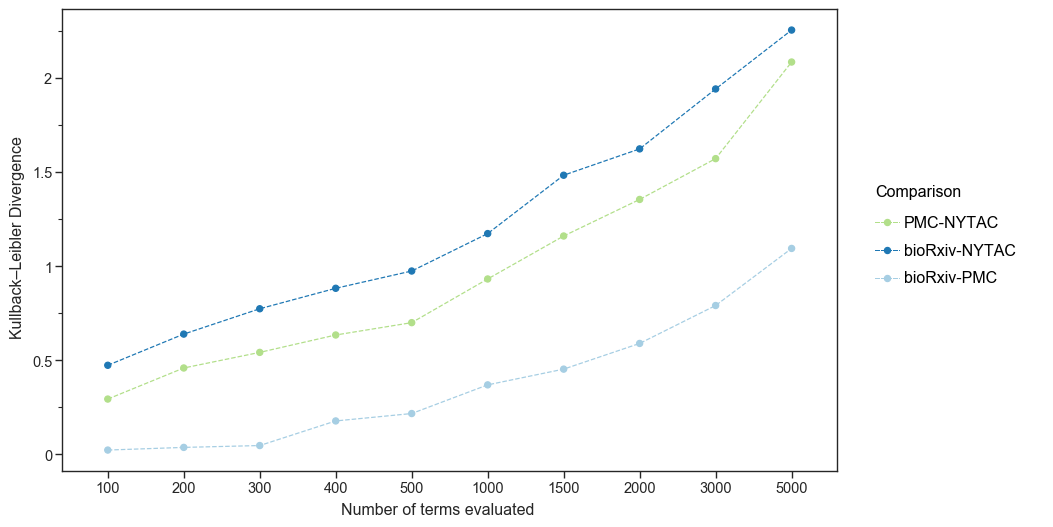

<ggplot: (-9223363298657828692)>


In [4]:
g = (
    p9.ggplot(
        kl_divergence_df.replace(
            {
                "biorxiv_vs_pmc": "bioRxiv-PMC",
                "biorxiv_vs_nytac": "bioRxiv-NYTAC",
                "pmc_vs_nytac": "PMC-NYTAC",
            }
        ).rename(index=str, columns={"comparison": "Comparison"})
    )
    + p9.aes(
        x="factor(num_terms)",
        y="KL_divergence",
        fill="Comparison",
        color="Comparison",
        group="Comparison",
    )
    + p9.geom_point(size=2)
    + p9.geom_line(linetype="dashed")
    + p9.scale_fill_brewer(type="qual", palette="Paired", direction=-1)
    + p9.scale_color_brewer(
        type="qual",
        palette="Paired",
        direction=-1,
    )
    + p9.labs(
        x="Number of terms evaluated",
        y="Kullback–Leibler Divergence",
    )
    + p9.theme_seaborn(
        context="paper",
        style="ticks",
        font_scale=1.2,
    )
    + p9.theme(figure_size=(10, 6), text=p9.element_text(family="Arial"))
)
g.save("output/svg_files/corpora_kl_divergence.svg")
g.save("output/figures/corpora_kl_divergence.png", dpi=500)
print(g)

In [5]:
kl_divergence_special_char_df = pd.read_csv(
    "output/comparison_stats/corpora_kl_divergence_special_chars_removed.tsv", sep="\t"
)
kl_divergence_special_char_df.head()

,num_terms,KL_divergence,comparison
0,100,0.022705,biorxiv_vs_pmc
1,100,0.209552,biorxiv_vs_nytac
2,100,0.819815,pmc_vs_nytac
3,200,0.030102,biorxiv_vs_pmc
4,200,1.156903,biorxiv_vs_nytac


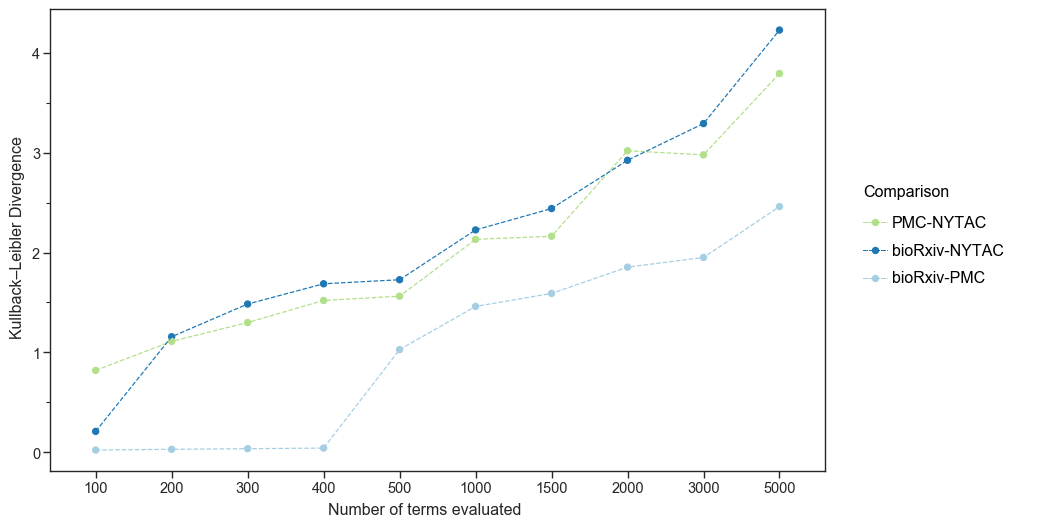

<ggplot: (-9223363298665839300)>


In [6]:
g = (
    p9.ggplot(
        kl_divergence_special_char_df.replace(
            {
                "biorxiv_vs_pmc": "bioRxiv-PMC",
                "biorxiv_vs_nytac": "bioRxiv-NYTAC",
                "pmc_vs_nytac": "PMC-NYTAC",
            }
        ).rename(index=str, columns={"comparison": "Comparison"})
    )
    + p9.aes(
        x="factor(num_terms)",
        y="KL_divergence",
        fill="Comparison",
        color="Comparison",
        group="Comparison",
    )
    + p9.geom_point(size=2)
    + p9.geom_line(linetype="dashed")
    + p9.scale_fill_brewer(type="qual", palette="Paired", direction=-1)
    + p9.scale_color_brewer(
        type="qual",
        palette="Paired",
        direction=-1,
    )
    + p9.labs(
        x="Number of terms evaluated",
        y="Kullback–Leibler Divergence",
    )
    + p9.theme_seaborn(
        context="paper",
        style="ticks",
        font_scale=1.2,
    )
    + p9.theme(figure_size=(10, 6), text=p9.element_text(family="Arial"))
)
# g.save("output/svg_files/corpora_kl_divergence.svg")
# g.save("output/figures/corpora_kl_divergence.png", dpi=500)
print(g)

# bioRxiv vs Pubmed Central

In [7]:
full_text_comparison = pd.read_csv(
    "output/comparison_stats/biorxiv_vs_pmc_comparison.tsv", sep="\t"
)
full_text_comparison.head()

,lemma,corpus_one_a,corpus_two_b,corpus_one_c,corpus_two_d,log_likelihood,odds_ratio
0,’,345652,4837734,262494660,5365015381,41488.085876,1.460319
1,–,211069,7614840,262494660,5365015381,79745.759155,0.566519
2,growth,240308,3933709,262494660,5365015381,10453.263824,1.248580
3,risk,94155,5338328,262494660,5365015381,136800.666016,0.360486
4,rna,280074,3073361,262494660,5365015381,83766.772949,1.862558


In [8]:
full_text_comparison_special_char = pd.read_csv(
    "output/comparison_stats/biorxiv_vs_pmc_comparison_special_chars_removed.tsv",
    sep="\t",
)
full_text_comparison_special_char.head()

,lemma,corpus_one_a,corpus_two_b,corpus_one_c,corpus_two_d,log_likelihood,odds_ratio
0,system,229194,5116317,420924101,8596698154,1782.156189,0.914900
1,sample,253603,4790248,420924101,8596698154,1434.901001,1.081245
2,obtained,187797,4807957,420924101,8596698154,9899.691711,0.797730
3,disease,156577,5089904,420924101,8596698154,38098.929871,0.628270
4,compared,351431,8527264,420924101,8596698154,10563.406982,0.841702


## Line Plots

### Original

In [9]:
full_plot_df = calculate_confidence_intervals(full_text_comparison)
full_plot_df.head()

,lemma,corpus_one_a,corpus_two_b,corpus_one_c,corpus_two_d,log_likelihood,odds_ratio,lower_odds,upper_odds,z_value,p_value
0,’,345652,4837734,262494660,5365015381,41488.085876,1.460319,1.455285,1.465370,214.930080,0.0
1,–,211069,7614840,262494660,5365015381,79745.759155,0.566519,0.564073,0.568975,-257.414493,0.0
2,growth,240308,3933709,262494660,5365015381,10453.263824,1.248580,1.243446,1.253736,105.603604,0.0
3,risk,94155,5338328,262494660,5365015381,136800.666016,0.360486,0.358170,0.362817,-310.294048,0.0
4,rna,280074,3073361,262494660,5365015381,83766.772949,1.862558,1.855362,1.869781,314.942681,0.0


In [10]:
plot_df = (
    full_plot_df.sort_values("odds_ratio", ascending=False)
    .head(subset)
    .append(
        full_plot_df.sort_values("odds_ratio", ascending=False).iloc[:-2].tail(subset)
    )
    .replace("rna", "RNA")
    .assign(
        odds_ratio=lambda x: x.odds_ratio.apply(lambda x: np.log2(x)),
        lower_odds=lambda x: x.lower_odds.apply(lambda x: np.log2(x)),
        upper_odds=lambda x: x.upper_odds.apply(lambda x: np.log2(x)),
    )
)
plot_df.head()

,lemma,corpus_one_a,corpus_two_b,corpus_one_c,corpus_two_d,log_likelihood,odds_ratio,lower_odds,upper_odds,z_value,p_value
74,neurons,245673,1628424,262494660,5365015381,205552.058197,1.624557,1.618434,1.630680,520.045969,0.0
44,genome,310549,2157447,262494660,5365015381,242049.757538,1.556790,1.551360,1.562220,561.930985,0.0
52,genetic,246116,2193087,262494660,5365015381,122719.776398,1.197670,1.191656,1.203683,390.341257,0.0
121,regions,276621,2613208,262494660,5365015381,121417.507721,1.113383,1.107726,1.119040,385.786100,0.0
81,al,1754312,17451861,262494660,5365015381,678998.794312,1.038819,1.036572,1.041065,906.233829,0.0


/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 10 x 6 in image.
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/svg_files/biorxiv_pmc_frequency_odds.svg
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 10 x 6 in image.
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/svg_files/biorxiv_pmc_frequency_odds.png


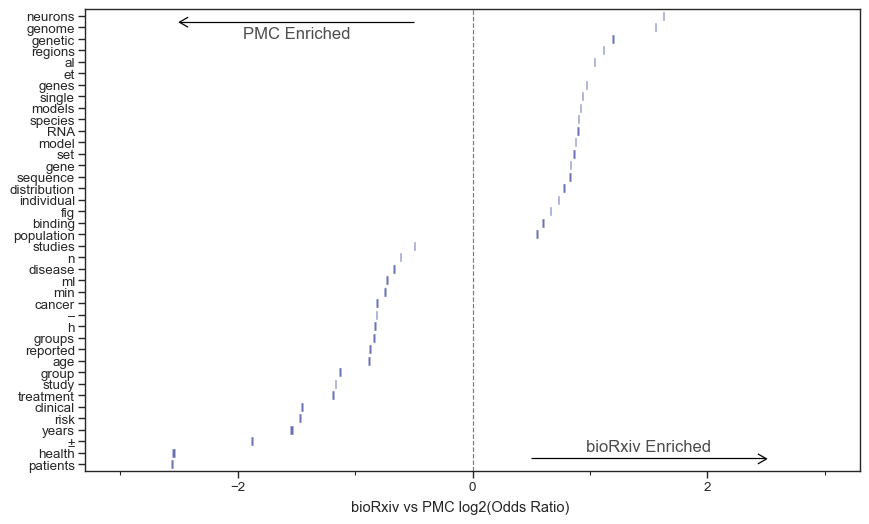

<ggplot: (-9223363298665812308)>


In [11]:
g = (
    p9.ggplot(
        plot_df, p9.aes(y="lemma", x="lower_odds", xend="upper_odds", yend="lemma")
    )
    + p9.geom_segment(color="#253494", size=3.5, alpha=0.7)
    + p9.scale_y_discrete(
        limits=(plot_df.sort_values("odds_ratio", ascending=True).lemma.tolist())
    )
    + p9.scale_x_continuous(limits=(-3, 3))
    + p9.geom_vline(p9.aes(xintercept=0), linetype="--", color="grey")
    + p9.annotate(
        "segment",
        x=0.5,
        xend=2.5,
        y=1.5,
        yend=1.5,
        colour="black",
        size=0.5,
        alpha=1,
        arrow=p9.arrow(length=0.1),
    )
    + p9.annotate("text", label="bioRxiv Enriched", x=1.5, y=2.5, size=12, alpha=0.7)
    + p9.annotate(
        "segment",
        x=-0.5,
        xend=-2.5,
        y=39.5,
        yend=39.5,
        colour="black",
        size=0.5,
        alpha=1,
        arrow=p9.arrow(length=0.1),
    )
    + p9.annotate("text", label="PMC Enriched", x=-1.5, y=38.5, size=12, alpha=0.7)
    + p9.theme_seaborn(context="paper", style="ticks", font_scale=1.1, font="Arial")
    + p9.theme(
        figure_size=(10, 6),
        panel_grid_minor=p9.element_blank(),
    )
    + p9.labs(y=None, x="bioRxiv vs PMC log2(Odds Ratio)")
)
g.save("output/svg_files/biorxiv_pmc_frequency_odds.svg")
g.save("output/svg_files/biorxiv_pmc_frequency_odds.png", dpi=75)
print(g)

In [12]:
count_plot_df = (
    create_lemma_count_df(plot_df, "bioRxiv", "pmc")
    .replace({"pmc": "PMC"})
    .assign(
        repository=lambda x: pd.Categorical(
            x.repository.tolist(), categories=["bioRxiv", "PMC"]
        )
    )
)
count_plot_df.head()

,lemma,count,repository
0,neurons,245673,bioRxiv
1,genome,310549,bioRxiv
2,genetic,246116,bioRxiv
3,regions,276621,bioRxiv
4,al,1754312,bioRxiv


/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 10 x 6 in image.
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/svg_files/biorxiv_pmc_frequency_bar.svg


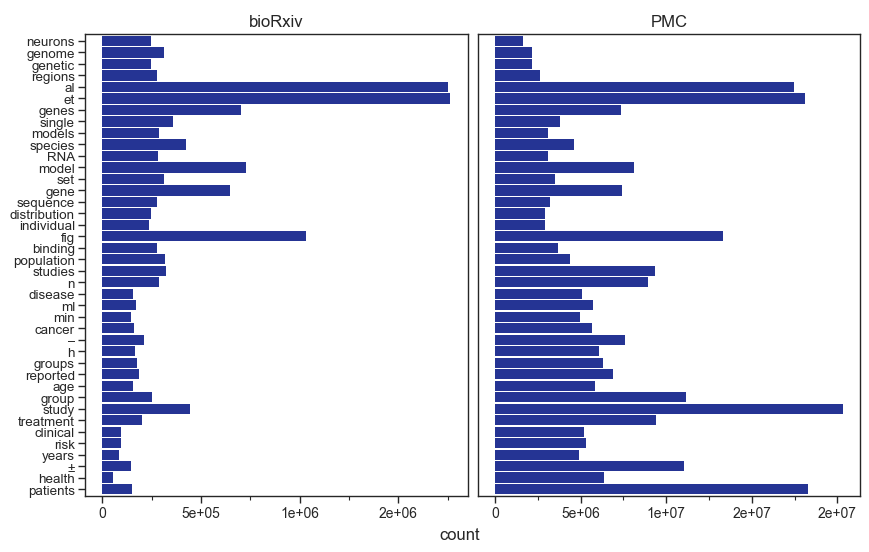

<ggplot: (8738187126164)>


In [13]:
g = plot_bargraph(count_plot_df, plot_df)
g.save("output/svg_files/biorxiv_pmc_frequency_bar.svg")
print(g)

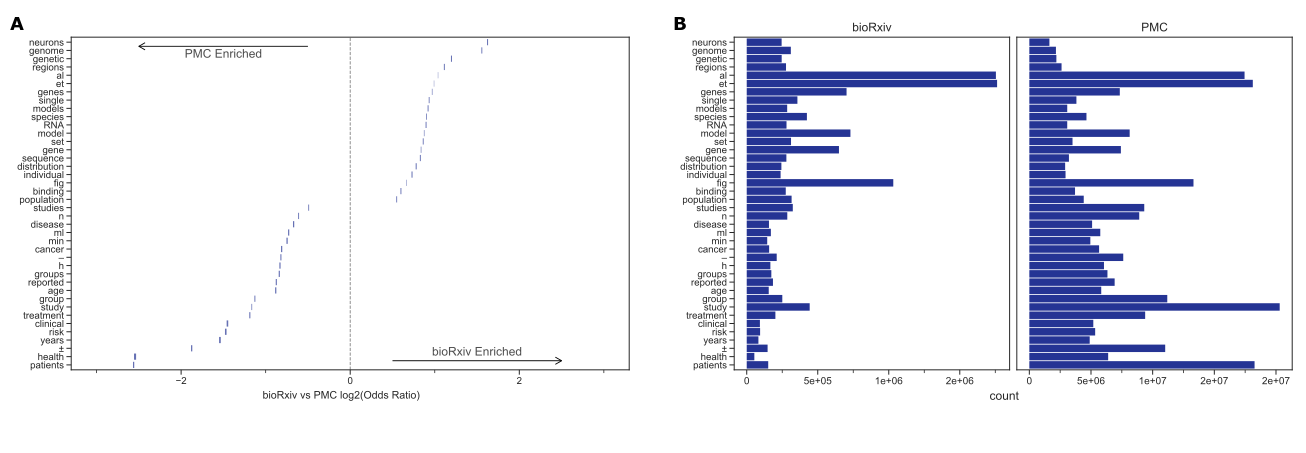

In [14]:
fig_output_path = "output/figures/biorxiv_vs_pubmed_central.png"

fig = plot_point_bar_figure(
    "output/svg_files/biorxiv_pmc_frequency_odds.svg",
    "output/svg_files/biorxiv_pmc_frequency_bar.svg",
)

# save generated SVG files
svg2png(bytestring=fig.to_str(), write_to=fig_output_path, dpi=75)

Image(fig_output_path)

### Special Char Removed

In [15]:
full_plot_special_char_df = calculate_confidence_intervals(
    full_text_comparison_special_char
)
full_plot_special_char_df.head()

,lemma,corpus_one_a,corpus_two_b,corpus_one_c,corpus_two_d,log_likelihood,odds_ratio,lower_odds,upper_odds,z_value,p_value
0,system,229194,5116317,420924101,8596698154,1782.156189,0.914900,0.911078,0.918738,-41.645303,0.0
1,sample,253603,4790248,420924101,8596698154,1434.901001,1.081245,1.076934,1.085574,38.324016,0.0
2,obtained,187797,4807957,420924101,8596698154,9899.691711,0.797730,0.794060,0.801417,-96.051892,0.0
3,disease,156577,5089904,420924101,8596698154,38098.929871,0.628270,0.625118,0.631438,-181.115253,0.0
4,compared,351431,8527264,420924101,8596698154,10563.406982,0.841702,0.838866,0.844547,-100.075416,0.0


In [16]:
plot_special_char_df = (
    full_plot_special_char_df.sort_values("odds_ratio", ascending=False)
    .head(subset)
    .append(
        full_plot_special_char_df.sort_values("odds_ratio", ascending=False)
        .iloc[:-2]
        .tail(subset)
    )
    .replace("rna", "RNA")
    .assign(
        odds_ratio=lambda x: x.odds_ratio.apply(lambda x: np.log2(x)),
        lower_odds=lambda x: x.lower_odds.apply(lambda x: np.log2(x)),
        upper_odds=lambda x: x.upper_odds.apply(lambda x: np.log2(x)),
    )
)
plot_special_char_df.head()

,lemma,corpus_one_a,corpus_two_b,corpus_one_c,corpus_two_d,log_likelihood,odds_ratio,lower_odds,upper_odds,z_value,p_value
34,neurons,245673,1628424,420924101,8596698154,205354.667908,1.623485,1.617364,1.629607,519.786274,0.0
40,genome,310549,2157447,420924101,8596698154,241816.926697,1.555718,1.550289,1.561147,561.658695,0.0
29,network,228770,2018146,420924101,8596698154,116321.577026,1.211090,1.204850,1.217329,380.428525,0.0
57,genetic,246116,2193087,420924101,8596698154,122549.588074,1.196598,1.190585,1.202611,390.056825,0.0
71,regions,276621,2613208,420924101,8596698154,121237.155212,1.112311,1.106656,1.117967,385.487202,0.0


/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 10 x 6 in image.
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/svg_files/biorxiv_pmc_frequency_odds_special_char_removed.svg
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 10 x 6 in image.
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/svg_files/biorxiv_pmc_frequency_odds_special_char_removed.png


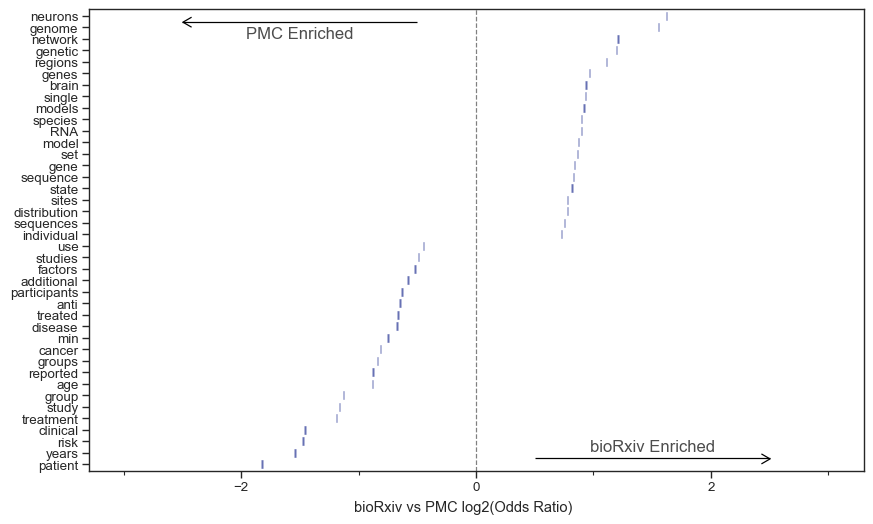

<ggplot: (-9223363298668099121)>


In [17]:
g = (
    p9.ggplot(
        plot_special_char_df,
        p9.aes(y="lemma", x="lower_odds", xend="upper_odds", yend="lemma"),
    )
    + p9.geom_segment(color="#253494", size=3.5, alpha=0.7)
    + p9.scale_y_discrete(
        limits=(
            plot_special_char_df.sort_values(
                "odds_ratio", ascending=True
            ).lemma.tolist()
        )
    )
    + p9.scale_x_continuous(limits=(-3, 3))
    + p9.geom_vline(p9.aes(xintercept=0), linetype="--", color="grey")
    + p9.annotate(
        "segment",
        x=0.5,
        xend=2.5,
        y=1.5,
        yend=1.5,
        colour="black",
        size=0.5,
        alpha=1,
        arrow=p9.arrow(length=0.1),
    )
    + p9.annotate("text", label="bioRxiv Enriched", x=1.5, y=2.5, size=12, alpha=0.7)
    + p9.annotate(
        "segment",
        x=-0.5,
        xend=-2.5,
        y=39.5,
        yend=39.5,
        colour="black",
        size=0.5,
        alpha=1,
        arrow=p9.arrow(length=0.1),
    )
    + p9.annotate("text", label="PMC Enriched", x=-1.5, y=38.5, size=12, alpha=0.7)
    + p9.theme_seaborn(context="paper", style="ticks", font_scale=1.1, font="Arial")
    + p9.theme(
        figure_size=(10, 6),
        panel_grid_minor=p9.element_blank(),
    )
    + p9.labs(y=None, x="bioRxiv vs PMC log2(Odds Ratio)")
)
g.save("output/svg_files/biorxiv_pmc_frequency_odds_special_char_removed.svg")
g.save("output/svg_files/biorxiv_pmc_frequency_odds_special_char_removed.png", dpi=75)
print(g)

In [18]:
count_plot_df = (
    create_lemma_count_df(plot_special_char_df, "bioRxiv", "pmc")
    .replace({"pmc": "PMC"})
    .assign(
        repository=lambda x: pd.Categorical(
            x.repository.tolist(), categories=["bioRxiv", "PMC"]
        )
    )
)
count_plot_df.head()

,lemma,count,repository
0,neurons,245673,bioRxiv
1,genome,310549,bioRxiv
2,network,228770,bioRxiv
3,genetic,246116,bioRxiv
4,regions,276621,bioRxiv


/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 10 x 6 in image.
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/svg_files/biorxiv_pmc_frequency_bar_special_char_removed.svg


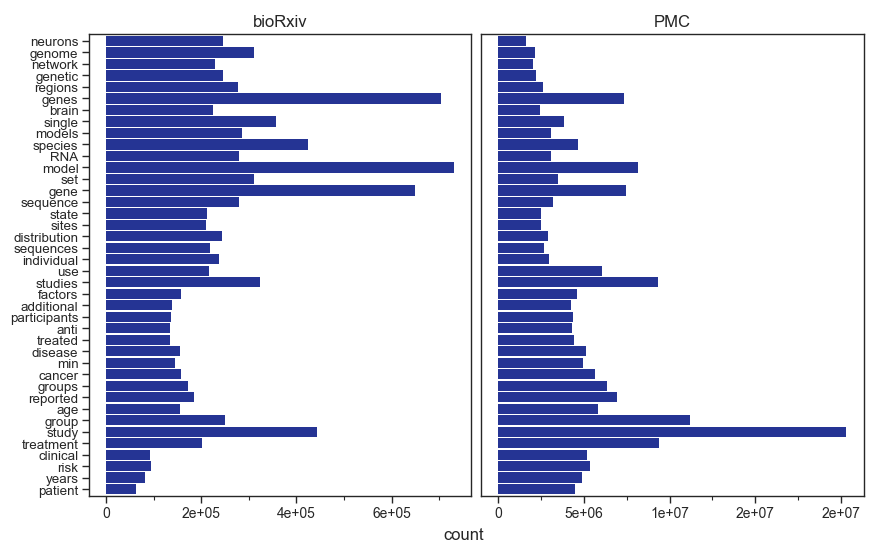

<ggplot: (-9223363298667987817)>


In [19]:
g = plot_bargraph(count_plot_df, plot_special_char_df)
g.save("output/svg_files/biorxiv_pmc_frequency_bar_special_char_removed.svg")
print(g)

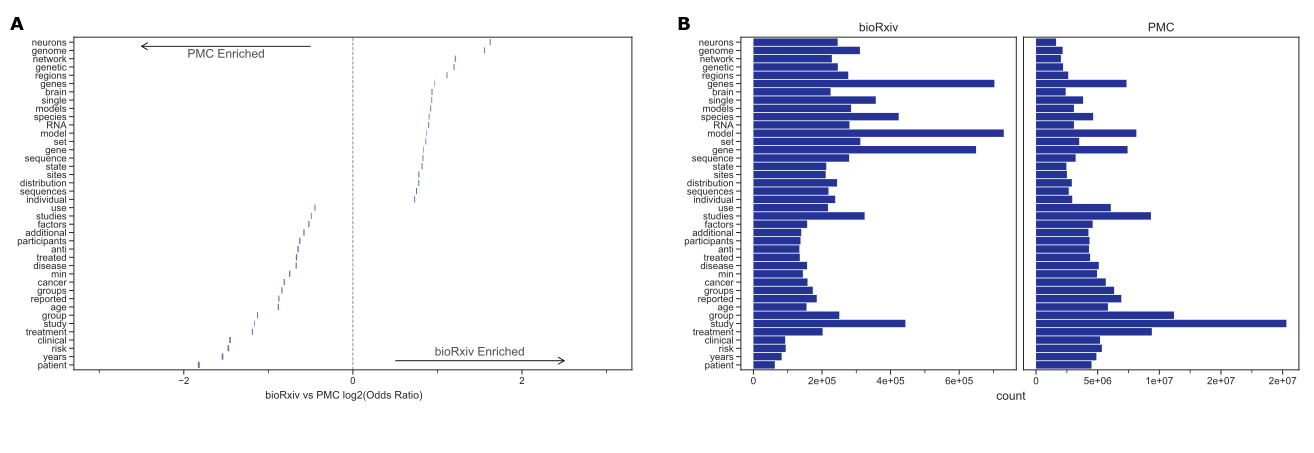

In [20]:
fig_output_path = "output/figures/biorxiv_vs_pubmed_central_special_char_removed.png"

fig = plot_point_bar_figure(
    "output/svg_files/biorxiv_pmc_frequency_odds_special_char_removed.svg",
    "output/svg_files/biorxiv_pmc_frequency_bar_special_char_removed.svg",
)

# save generated SVG files
svg2png(bytestring=fig.to_str(), write_to=fig_output_path, dpi=75)

Image(fig_output_path)

# bioRxiv vs Reference

In [21]:
full_text_comparison = pd.read_csv(
    "output/comparison_stats/biorxiv_nytac_comparison.tsv", sep="\t"
)
full_text_comparison.head()

,lemma,corpus_one_a,corpus_two_b,corpus_one_c,corpus_two_d,log_likelihood,odds_ratio
0,house,11025,802719,262494660,659277495,448757.653778,0.034496
1,yesterday,65,816741,262494660,659277495,545985.714767,0.000200
2,best,82201,501641,262494660,659277495,68168.151474,0.411559
3,’,345652,1070,262494660,659277495,854209.302498,811.340349
4,net,22817,504167,262494660,659277495,207272.925217,0.113666


In [22]:
full_text_comparison_special_char = pd.read_csv(
    "output/comparison_stats/biorxiv_nytac_comparison_special_chars_removed.tsv",
    sep="\t",
)
full_text_comparison_special_char.head()

,lemma,corpus_one_a,corpus_two_b,corpus_one_c,corpus_two_d,log_likelihood,odds_ratio
0,system,229194,411423,420924101,1218668568,31884.849548,1.612859
1,season,14253,544258,420924101,1218668568,228950.505646,0.075820
2,sample,253603,17059,420924101,1218668568,572359.534927,43.041028
3,city,6200,1357957,420924101,1218668568,743010.275284,0.013219
4,compared,351431,98796,420924101,1218668568,540349.911285,10.298703


## Line Plots

### Original

In [23]:
full_plot_df = calculate_confidence_intervals(full_text_comparison)
full_plot_df.head()

,lemma,corpus_one_a,corpus_two_b,corpus_one_c,corpus_two_d,log_likelihood,odds_ratio,lower_odds,upper_odds,z_value,p_value
0,house,11025,802719,262494660,659277495,448757.653778,0.034496,0.033853,0.035150,-351.113962,0.0
1,yesterday,65,816741,262494660,659277495,545985.714767,0.000200,0.000157,0.000255,-68.669763,0.0
2,best,82201,501641,262494660,659277495,68168.151474,0.411559,0.408534,0.414606,-235.897076,0.0
3,’,345652,1070,262494660,659277495,854209.302498,811.340349,764.082557,861.520991,218.780807,0.0
4,net,22817,504167,262494660,659277495,207272.925217,0.113666,0.112168,0.115184,-321.254717,0.0


In [24]:
plot_df = (
    full_plot_df.sort_values("odds_ratio", ascending=False)
    .head(subset)
    .append(
        full_plot_df.sort_values("odds_ratio", ascending=False).iloc[:-2].tail(subset)
    )
    .replace("rna", "RNA")
    .assign(
        odds_ratio=lambda x: x.odds_ratio.apply(lambda x: np.log2(x)),
        lower_odds=lambda x: x.lower_odds.apply(lambda x: np.log2(x)),
        upper_odds=lambda x: x.upper_odds.apply(lambda x: np.log2(x)),
    )
)
plot_df.head()

,lemma,corpus_one_a,corpus_two_b,corpus_one_c,corpus_two_d,log_likelihood,odds_ratio,lower_odds,upper_odds,z_value,p_value
21,°,302552,2,262494660,659277495,7.597517e+05,18.535421,16.535941,20.534901,18.169438,4.505865e-74
143,mm,238592,360,262494660,659277495,5.940637e+05,10.700931,10.551786,10.850075,140.627565,0.000000e+00
141,fig,1031812,2541,262494660,659277495,2.555250e+06,9.994166,9.938001,10.050331,348.768545,0.000000e+00
3,’,345652,1070,262494660,659277495,8.542093e+05,9.664163,9.577585,9.750742,218.780807,0.000000e+00
7,RNA,280074,1088,262494660,659277495,6.898414e+05,9.336583,9.250690,9.422477,213.051563,0.000000e+00


/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 10 x 6 in image.
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/svg_files/biorxiv_nytac_frequency_odds.svg
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 10 x 6 in image.
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/svg_files/biorxiv_nytac_frequency_odds.png


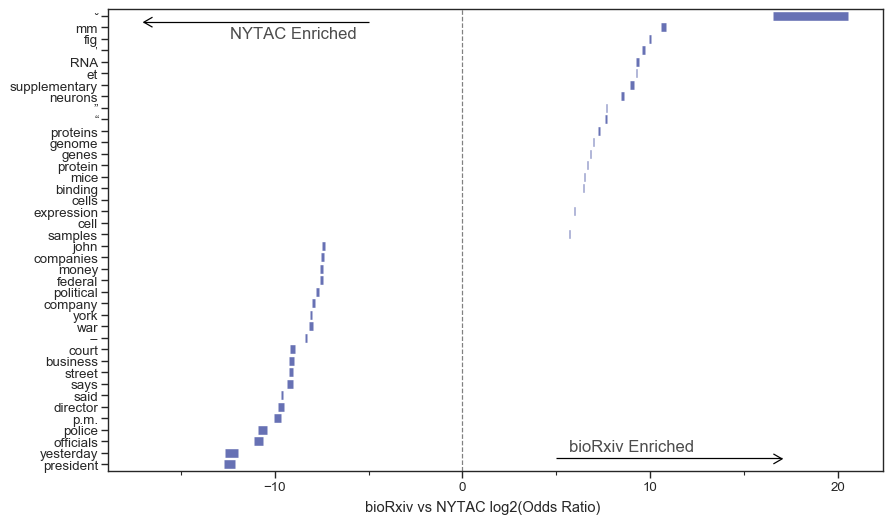

<ggplot: (-9223363298669581473)>


In [25]:
g = (
    p9.ggplot(
        plot_df, p9.aes(y="lemma", x="lower_odds", xend="upper_odds", yend="lemma")
    )
    + p9.geom_segment(color="#253494", size=3.5, alpha=0.7)
    + p9.scale_y_discrete(
        limits=(plot_df.sort_values("odds_ratio", ascending=True).lemma.tolist())
    )
    + p9.geom_vline(p9.aes(xintercept=0), linetype="--", color="grey")
    + p9.annotate(
        "segment",
        x=5,
        xend=17,
        y=1.5,
        yend=1.5,
        colour="black",
        size=0.5,
        alpha=1,
        arrow=p9.arrow(length=0.1),
    )
    + p9.annotate("text", label="bioRxiv Enriched", x=9, y=2.5, size=12, alpha=0.7)
    + p9.annotate(
        "segment",
        x=-5,
        xend=-17,
        y=39.5,
        yend=39.5,
        colour="black",
        size=0.5,
        alpha=1,
        arrow=p9.arrow(length=0.1),
    )
    + p9.annotate("text", label="NYTAC Enriched", x=-9, y=38.5, size=12, alpha=0.7)
    + p9.theme_seaborn(context="paper", style="ticks", font_scale=1.1, font="Arial")
    + p9.theme(
        figure_size=(10, 6),
        panel_grid_minor=p9.element_blank(),
    )
    + p9.labs(y=None, x="bioRxiv vs NYTAC log2(Odds Ratio)")
)

g.save("output/svg_files/biorxiv_nytac_frequency_odds.svg")
g.save("output/svg_files/biorxiv_nytac_frequency_odds.png", dpi=250)
print(g)

In [26]:
count_plot_df = create_lemma_count_df(plot_df, "bioRxiv", "NYTAC").assign(
    repository=lambda x: pd.Categorical(
        x.repository.tolist(), categories=["bioRxiv", "NYTAC"]
    )
)
count_plot_df.head()

,lemma,count,repository
0,°,302552,bioRxiv
1,mm,238592,bioRxiv
2,fig,1031812,bioRxiv
3,’,345652,bioRxiv
4,RNA,280074,bioRxiv


/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 10 x 6 in image.
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/svg_files/biorxiv_nytac_frequency_bar.svg


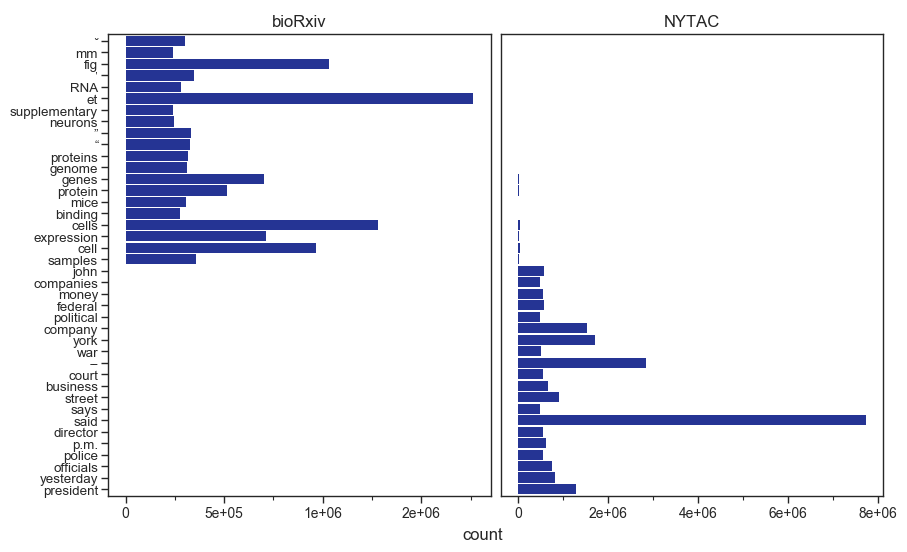

<ggplot: (8738187295766)>


In [27]:
g = plot_bargraph(count_plot_df, plot_df)
g.save("output/svg_files/biorxiv_nytac_frequency_bar.svg")
print(g)

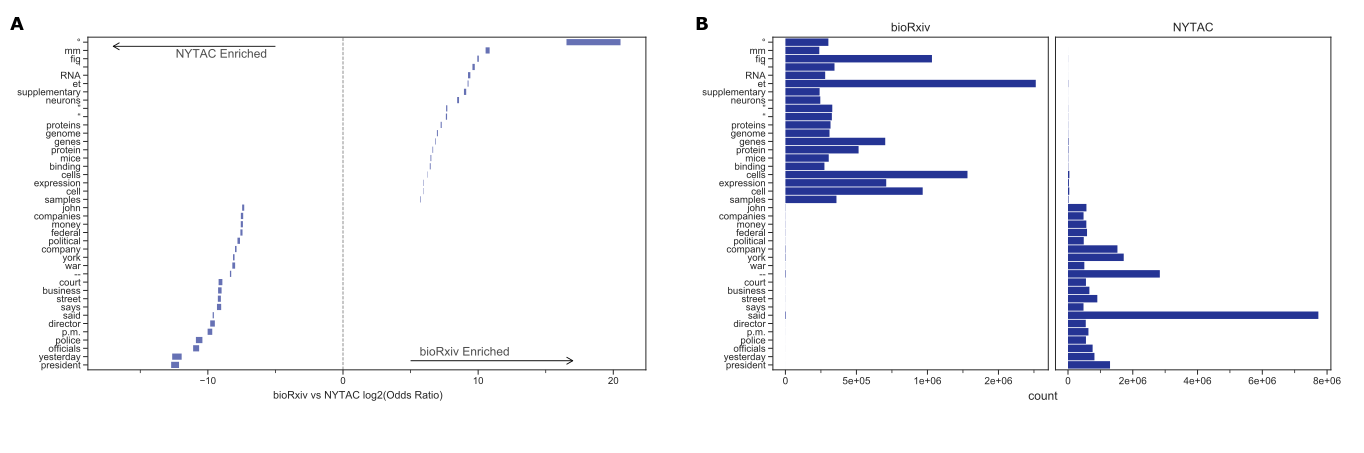

In [28]:
fig_output_path = "output/figures/biorxiv_vs_reference.png"

fig = plot_point_bar_figure(
    "output/svg_files/biorxiv_nytac_frequency_odds.svg",
    "output/svg_files/biorxiv_nytac_frequency_bar.svg",
)

# save generated SVG files
svg2png(bytestring=fig.to_str(), write_to=fig_output_path, dpi=75)

Image(fig_output_path)

### Special Char Removed

In [29]:
full_plot_special_char_df = calculate_confidence_intervals(
    full_text_comparison_special_char
)
full_plot_special_char_df.head()

,lemma,corpus_one_a,corpus_two_b,corpus_one_c,corpus_two_d,log_likelihood,odds_ratio,lower_odds,upper_odds,z_value,p_value
0,system,229194,411423,420924101,1218668568,31884.849548,1.612859,1.604639,1.621122,183.349716,0.0
1,season,14253,544258,420924101,1218668568,228950.505646,0.075820,0.074569,0.077091,-303.981943,0.0
2,sample,253603,17059,420924101,1218668568,572359.534927,43.041028,42.378892,43.713509,475.626219,0.0
3,city,6200,1357957,420924101,1218668568,743010.275284,0.013219,0.012893,0.013553,-339.861152,0.0
4,compared,351431,98796,420924101,1218668568,540349.911285,10.298703,10.226261,10.371657,647.518703,0.0


In [30]:
plot_special_char_df = (
    full_plot_special_char_df.sort_values("odds_ratio", ascending=False)
    .head(subset)
    .append(
        full_plot_special_char_df.sort_values("odds_ratio", ascending=False)
        .iloc[:-2]
        .tail(subset)
    )
    .replace("rna", "RNA")
    .assign(
        odds_ratio=lambda x: x.odds_ratio.apply(lambda x: np.log2(x)),
        lower_odds=lambda x: x.lower_odds.apply(lambda x: np.log2(x)),
        upper_odds=lambda x: x.upper_odds.apply(lambda x: np.log2(x)),
    )
)
plot_special_char_df.head()

,lemma,corpus_one_a,corpus_two_b,corpus_one_c,corpus_two_d,log_likelihood,odds_ratio,lower_odds,upper_odds,z_value,p_value
121,fig,1031812,2541,420924101,1218668568,2.770034e+06,10.199242,10.143077,10.255407,355.926089,0.0
55,RNA,280074,1088,420924101,1218668568,7.479105e+05,9.541659,9.455766,9.627553,217.731445,0.0
134,supplementary,240831,1155,420924101,1218668568,6.408726e+05,9.237658,9.154256,9.321061,217.089401,0.0
46,neurons,245673,1685,420924101,1218668568,6.488301e+05,8.721521,8.652399,8.790643,247.304605,0.0
88,proteins,317669,5186,420924101,1218668568,8.136649e+05,7.470432,7.430847,7.510017,369.885714,0.0


/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 10 x 6 in image.
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/svg_files/biorxiv_nytac_frequency_odds_special_char_removed.svg
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 10 x 6 in image.
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/svg_files/biorxiv_nytac_frequency_odds_special_char_removed.png


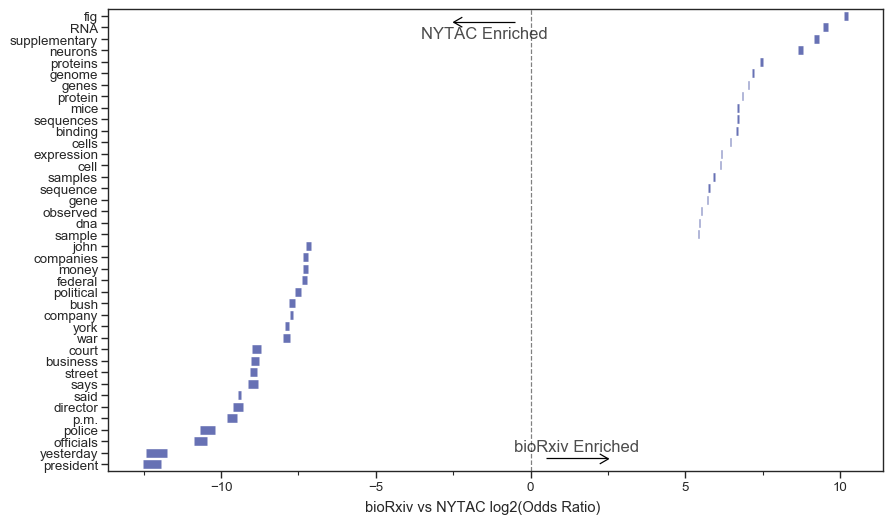

<ggplot: (8738186522502)>


In [31]:
g = (
    p9.ggplot(
        plot_special_char_df,
        p9.aes(y="lemma", x="lower_odds", xend="upper_odds", yend="lemma"),
    )
    + p9.geom_segment(color="#253494", size=3.5, alpha=0.7)
    + p9.scale_y_discrete(
        limits=(
            plot_special_char_df.sort_values(
                "odds_ratio", ascending=True
            ).lemma.tolist()
        )
    )
    + p9.geom_vline(p9.aes(xintercept=0), linetype="--", color="grey")
    + p9.annotate(
        "segment",
        x=0.5,
        xend=2.5,
        y=1.5,
        yend=1.5,
        colour="black",
        size=0.5,
        alpha=1,
        arrow=p9.arrow(length=0.1),
    )
    + p9.annotate("text", label="bioRxiv Enriched", x=1.5, y=2.5, size=12, alpha=0.7)
    + p9.annotate(
        "segment",
        x=-0.5,
        xend=-2.5,
        y=39.5,
        yend=39.5,
        colour="black",
        size=0.5,
        alpha=1,
        arrow=p9.arrow(length=0.1),
    )
    + p9.annotate("text", label="NYTAC Enriched", x=-1.5, y=38.5, size=12, alpha=0.7)
    + p9.theme_seaborn(context="paper", style="ticks", font_scale=1.1, font="Arial")
    + p9.theme(
        figure_size=(10, 6),
        panel_grid_minor=p9.element_blank(),
    )
    + p9.labs(y=None, x="bioRxiv vs NYTAC log2(Odds Ratio)")
)
g.save("output/svg_files/biorxiv_nytac_frequency_odds_special_char_removed.svg")
g.save(
    "output/svg_files/biorxiv_nytac_frequency_odds_special_char_removed.png", dpi=250
)
print(g)

In [32]:
count_plot_df = create_lemma_count_df(plot_special_char_df, "bioRxiv", "NYTAC").assign(
    repository=lambda x: pd.Categorical(
        x.repository.tolist(), categories=["bioRxiv", "nytac"]
    )
)
count_plot_df.head()

,lemma,count,repository
0,fig,1031812,bioRxiv
1,RNA,280074,bioRxiv
2,supplementary,240831,bioRxiv
3,neurons,245673,bioRxiv
4,proteins,317669,bioRxiv


/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 10 x 6 in image.
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/svg_files/biorxiv_nytac_frequency_bar_special_char_removed.svg


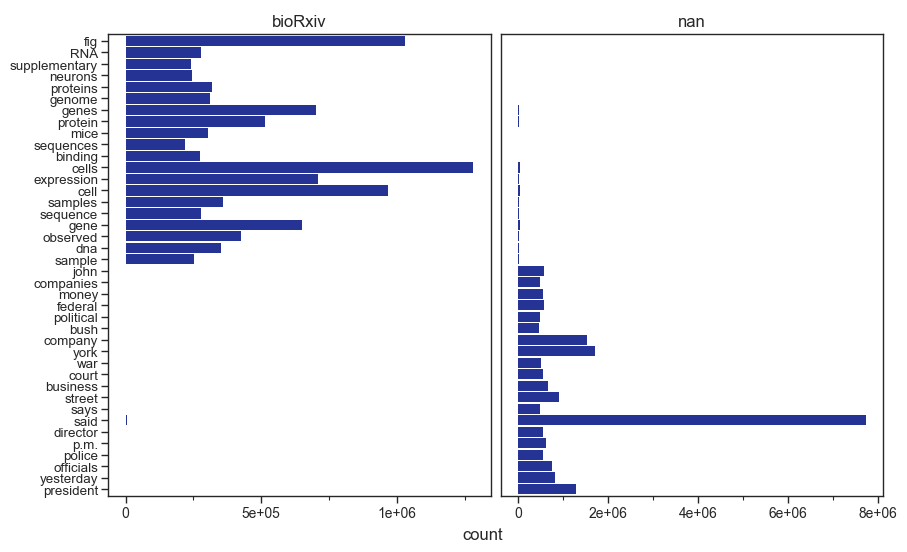

<ggplot: (8738186407663)>


In [33]:
g = plot_bargraph(count_plot_df, plot_special_char_df)
g.save("output/svg_files/biorxiv_nytac_frequency_bar_special_char_removed.svg")
print(g)

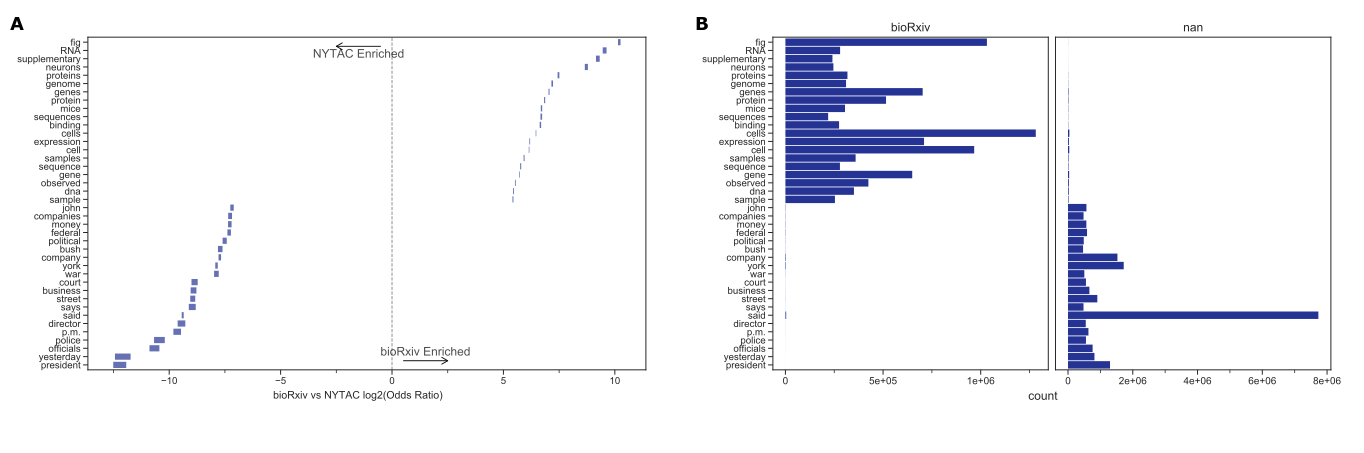

In [34]:
fig_output_path = "output/figures/biorxiv_vs_reference_special_char_removed.png"

fig = plot_point_bar_figure(
    "output/svg_files/biorxiv_nytac_frequency_odds_special_char_removed.svg",
    "output/svg_files/biorxiv_nytac_frequency_bar_special_char_removed.svg",
)

# save generated SVG files
svg2png(bytestring=fig.to_str(), write_to=fig_output_path, dpi=75)

Image(fig_output_path)

# PMC vs Reference

In [35]:
full_text_comparison = pd.read_csv(
    "output/comparison_stats/pmc_nytac_comparison.tsv", sep="\t"
)
full_text_comparison.head()

,lemma,corpus_one_a,corpus_two_b,corpus_one_c,corpus_two_d,log_likelihood,odds_ratio
0,house,236735,802719,5365015381,659277495,2.490533e+06,0.036241
1,yesterday,3190,816741,5365015381,659277495,3.572001e+06,0.000480
2,best,1323985,501641,5365015381,659277495,3.796544e+05,0.324330
3,’,4837734,1070,5365015381,659277495,1.105503e+06,555.591365
4,–,7614840,1,5365015381,659277495,1.763922e+06,935746.178437


In [36]:
full_text_comparison_special_char = pd.read_csv(
    "output/comparison_stats/pmc_nytac_comparison_special_chars_removed.tsv", sep="\t"
)
full_text_comparison_special_char.head()

,lemma,corpus_one_a,corpus_two_b,corpus_one_c,corpus_two_d,log_likelihood,odds_ratio
0,system,5116317,411423,8596698154,1218668568,1.439762e+05,1.762880
1,season,340323,544258,8596698154,1218668568,1.182061e+06,0.088642
2,sample,4790248,17059,8596698154,1218668568,1.114433e+06,39.806900
3,obtained,4807957,29724,8596698154,1218668568,1.036518e+06,22.930169
4,disease,5089904,110870,8596698154,1218668568,7.392109e+05,6.508029


## Line Plots

### Original

In [37]:
full_plot_df = calculate_confidence_intervals(full_text_comparison)
full_plot_df.head()

,lemma,corpus_one_a,corpus_two_b,corpus_one_c,corpus_two_d,log_likelihood,odds_ratio,lower_odds,upper_odds,z_value,p_value
0,house,236735,802719,5365015381,659277495,2.490533e+06,0.036241,0.036075,3.640720e-02,-1418.284304,0.000000e+00
1,yesterday,3190,816741,5365015381,659277495,3.572001e+06,0.000480,0.000464,4.969402e-04,-430.768552,0.000000e+00
2,best,1323985,501641,5365015381,659277495,3.796544e+05,0.324330,0.323278,3.253861e-01,-678.943195,0.000000e+00
3,’,4837734,1070,5365015381,659277495,1.105503e+06,555.591365,523.275158,5.899033e+02,206.710635,0.000000e+00
4,–,7614840,1,5365015381,659277495,1.763922e+06,935746.178437,131807.711894,6.643169e+06,13.749099,2.578400e-43


In [38]:
plot_df = (
    full_plot_df.sort_values("odds_ratio", ascending=False)
    .drop([17, 154])
    .head(subset)
    .append(
        full_plot_df.sort_values("odds_ratio", ascending=False).iloc[:-2].tail(subset)
    )
    .replace("rna", "RNA")
    .assign(
        odds_ratio=lambda x: x.odds_ratio.apply(lambda x: np.log2(x)),
        lower_odds=lambda x: x.lower_odds.apply(lambda x: np.log2(x)),
        upper_odds=lambda x: x.upper_odds.apply(lambda x: np.log2(x)),
    )
)
plot_df.head()

,lemma,corpus_one_a,corpus_two_b,corpus_one_c,corpus_two_d,log_likelihood,odds_ratio,lower_odds,upper_odds,z_value,p_value
152,\t\t\t\t,18199325,1,5365015381,659277495,4.211862e+06,21.092757,18.265075,23.920439,14.620385,1.041103e-48
117,±,11016756,1,5365015381,659277495,2.551201e+06,20.368572,17.540889,23.196254,14.118417,1.462433e-45
4,–,7614840,1,5365015381,659277495,1.763922e+06,19.835758,17.008075,22.663440,13.749099,2.578400e-43
160,,5160158,1,5365015381,659277495,1.195562e+06,19.274359,16.446677,22.102042,13.359966,5.180541e-41
19,°,8136102,2,5365015381,659277495,1.884558e+06,18.931282,16.931808,20.930755,18.557541,3.543780e-77


/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 10 x 6 in image.
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/svg_files/pmc_nytac_frequency_odds.svg
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/matplotlib/textpath.py:90: RuntimeWarning: Glyph 8202 missing from current font.
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/matplotlib/textpath.py:90: RuntimeWarning: Glyph 9 missing from current font.
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/matplotlib/textpath.py:203: RuntimeWarning: Glyph 8202 missing from current font.
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/matplotlib/textpath.py:203: RuntimeWarning: Glyph 9 missing from current font.
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: S

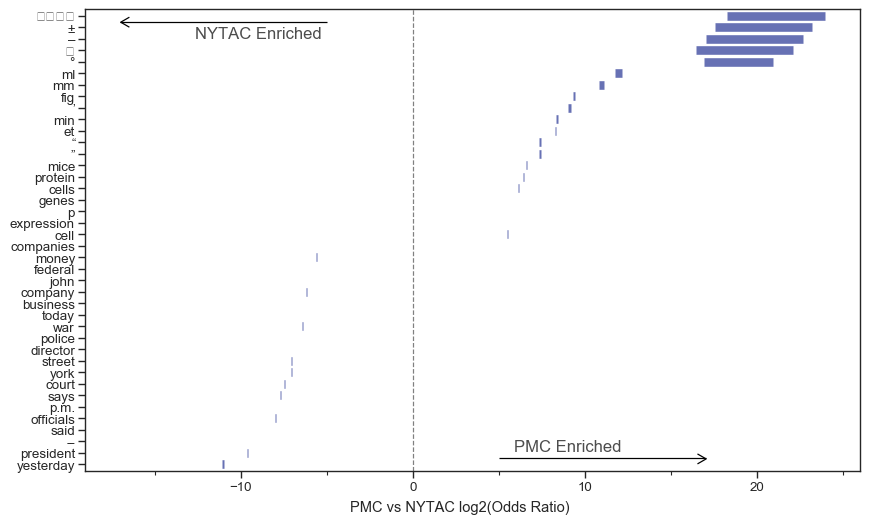

<ggplot: (8738188961698)>


In [39]:
g = (
    p9.ggplot(
        plot_df, p9.aes(y="lemma", x="lower_odds", xend="upper_odds", yend="lemma")
    )
    + p9.geom_segment(color="#253494", size=3.5, alpha=0.7)
    + p9.scale_y_discrete(
        limits=(plot_df.sort_values("odds_ratio", ascending=True).lemma.tolist())
    )
    + p9.geom_vline(p9.aes(xintercept=0), linetype="--", color="grey")
    + p9.annotate(
        "segment",
        x=5,
        xend=17,
        y=1.5,
        yend=1.5,
        colour="black",
        size=0.5,
        alpha=1,
        arrow=p9.arrow(length=0.1),
    )
    + p9.annotate("text", label="PMC Enriched", x=9, y=2.5, size=12, alpha=0.7)
    + p9.annotate(
        "segment",
        x=-5,
        xend=-17,
        y=39.5,
        yend=39.5,
        colour="black",
        size=0.5,
        alpha=1,
        arrow=p9.arrow(length=0.1),
    )
    + p9.annotate("text", label="NYTAC Enriched", x=-9, y=38.5, size=12, alpha=0.7)
    + p9.theme_seaborn(context="paper", style="ticks", font_scale=1.1, font="Arial")
    + p9.theme(
        figure_size=(10, 6),
        panel_grid_minor=p9.element_blank(),
    )
    + p9.labs(y=None, x="PMC vs NYTAC log2(Odds Ratio)")
)
g.save("output/svg_files/pmc_nytac_frequency_odds.svg")
g.save("output/svg_files/pmc_nytac_frequency_odds.png", dpi=250)
print(g)

In [40]:
count_plot_df = create_lemma_count_df(plot_df, "pmc", "reference").replace(
    {"pmc": "PMC", "reference": "NYTAC"}
)
count_plot_df.head()

,lemma,count,repository
0,\t\t\t\t,18199325,PMC
1,±,11016756,PMC
2,–,7614840,PMC
3,,5160158,PMC
4,°,8136102,PMC


/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 10 x 6 in image.
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/svg_files/pmc_nytac_frequency_bar.svg
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/matplotlib/textpath.py:90: RuntimeWarning: Glyph 8202 missing from current font.
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/matplotlib/textpath.py:90: RuntimeWarning: Glyph 9 missing from current font.
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/matplotlib/textpath.py:203: RuntimeWarning: Glyph 8202 missing from current font.
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/matplotlib/textpath.py:203: RuntimeWarning: Glyph 9 missing from current font.
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: Run

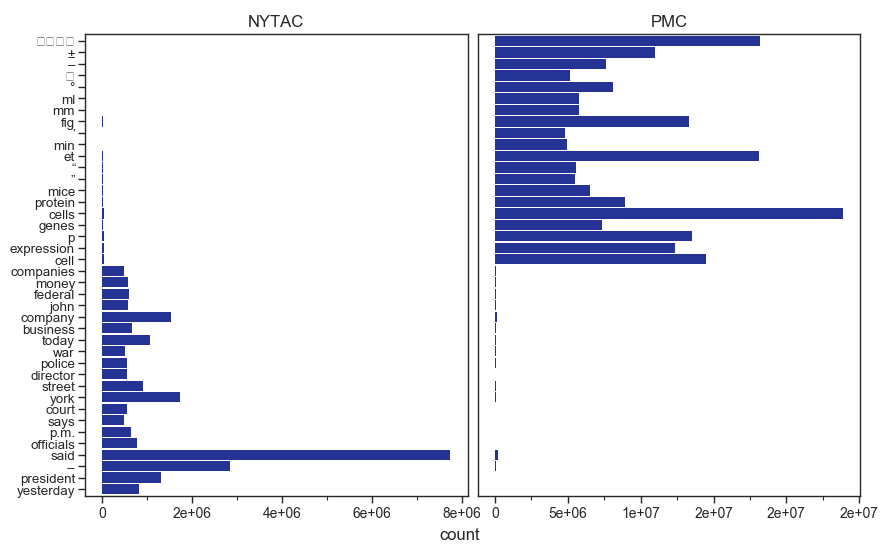

<ggplot: (-9223363298668460782)>


In [41]:
g = plot_bargraph(count_plot_df, plot_df)
g.save("output/svg_files/pmc_nytac_frequency_bar.svg", dpi=75)
print(g)

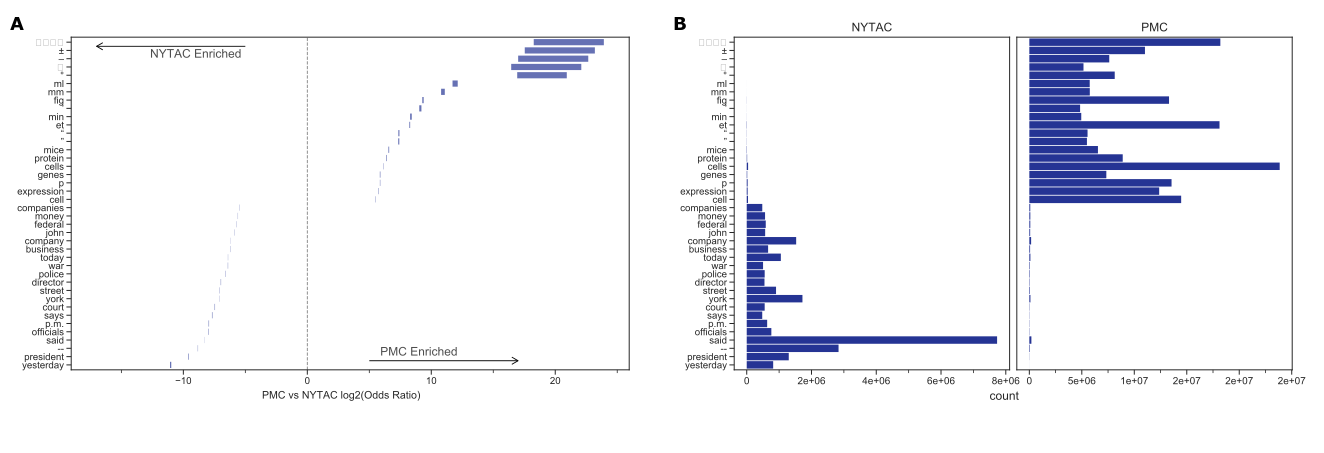

In [42]:
fig_output_path = "output/figures/pmc_vs_reference.png"

fig = plot_point_bar_figure(
    "output/svg_files/pmc_nytac_frequency_odds.svg",
    "output/svg_files/pmc_nytac_frequency_bar.svg",
)

# save generated SVG files
svg2png(bytestring=fig.to_str(), write_to=fig_output_path, dpi=75)

Image(fig_output_path)

### Special Char Removed

In [43]:
full_plot_special_char_df = calculate_confidence_intervals(
    full_text_comparison_special_char
)
full_plot_special_char_df.head()

,lemma,corpus_one_a,corpus_two_b,corpus_one_c,corpus_two_d,log_likelihood,odds_ratio,lower_odds,upper_odds,z_value,p_value
0,system,5116317,411423,8596698154,1218668568,1.439762e+05,1.762880,1.757289,1.768489,349.796707,0.0
1,season,340323,544258,8596698154,1218668568,1.182061e+06,0.088642,0.088263,0.089023,-1108.706296,0.0
2,sample,4790248,17059,8596698154,1218668568,1.114433e+06,39.806900,39.212946,40.409851,480.314575,0.0
3,obtained,4807957,29724,8596698154,1218668568,1.036518e+06,22.930169,22.670165,23.193155,538.386198,0.0
4,disease,5089904,110870,8596698154,1218668568,7.392109e+05,6.508029,6.469418,6.546870,616.952924,0.0


In [44]:
plot_special_char_df = (
    full_plot_special_char_df.sort_values("odds_ratio", ascending=False)
    .head(subset)
    .append(
        full_plot_special_char_df.sort_values("odds_ratio", ascending=False)
        .iloc[:-2]
        .tail(subset)
    )
    .replace("rna", "RNA")
    .assign(
        odds_ratio=lambda x: x.odds_ratio.apply(lambda x: np.log2(x)),
        lower_odds=lambda x: x.lower_odds.apply(lambda x: np.log2(x)),
        upper_odds=lambda x: x.upper_odds.apply(lambda x: np.log2(x)),
    )
)
plot_special_char_df.head()

,lemma,corpus_one_a,corpus_two_b,corpus_one_c,corpus_two_d,log_likelihood,odds_ratio,lower_odds,upper_odds,z_value,p_value
116,fig,13310282,2541,8596698154,1218668568,3.488564e+06,9.536380,9.480279,9.592481,333.172685,0.0
110,min,4947283,1852,8596698154,1218668568,1.286178e+06,8.564860,8.499141,8.630579,255.437444,0.0
83,proteins,4602840,5186,8596698154,1218668568,1.160955e+06,6.975210,6.935922,7.014498,347.979293,0.0
185,mice,6537299,8445,8596698154,1218668568,1.638694e+06,6.777905,6.747114,6.808695,431.458170,0.0
172,protein,8898282,12937,8596698154,1218668568,2.217226e+06,6.607403,6.582524,6.632282,520.541006,0.0


/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 10 x 6 in image.
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/svg_files/pmc_nytac_frequency_odds_special_char_removed.svg
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 10 x 6 in image.
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/svg_files/pmc_nytac_frequency_odds_special_char_removed.png


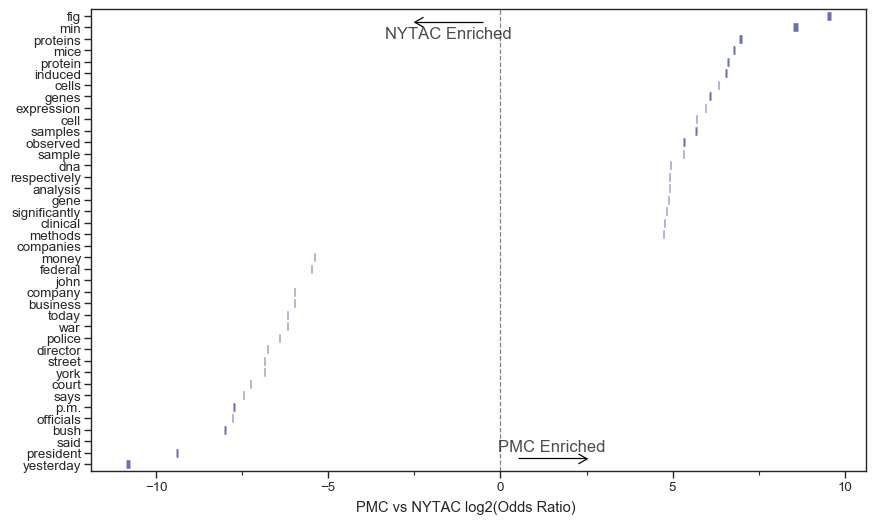

<ggplot: (8738186252131)>


In [45]:
g = (
    p9.ggplot(
        plot_special_char_df,
        p9.aes(y="lemma", x="lower_odds", xend="upper_odds", yend="lemma"),
    )
    + p9.geom_segment(color="#253494", size=3.5, alpha=0.7)
    + p9.scale_y_discrete(
        limits=(
            plot_special_char_df.sort_values(
                "odds_ratio", ascending=True
            ).lemma.tolist()
        )
    )
    + p9.geom_vline(p9.aes(xintercept=0), linetype="--", color="grey")
    + p9.annotate(
        "segment",
        x=0.5,
        xend=2.5,
        y=1.5,
        yend=1.5,
        colour="black",
        size=0.5,
        alpha=1,
        arrow=p9.arrow(length=0.1),
    )
    + p9.annotate("text", label="PMC Enriched", x=1.5, y=2.5, size=12, alpha=0.7)
    + p9.annotate(
        "segment",
        x=-0.5,
        xend=-2.5,
        y=39.5,
        yend=39.5,
        colour="black",
        size=0.5,
        alpha=1,
        arrow=p9.arrow(length=0.1),
    )
    + p9.annotate("text", label="NYTAC Enriched", x=-1.5, y=38.5, size=12, alpha=0.7)
    + p9.theme_seaborn(context="paper", style="ticks", font_scale=1.1, font="Arial")
    + p9.theme(
        figure_size=(10, 6),
        panel_grid_minor=p9.element_blank(),
    )
    + p9.labs(y=None, x="PMC vs NYTAC log2(Odds Ratio)")
)
g.save("output/svg_files/pmc_nytac_frequency_odds_special_char_removed.svg")
g.save("output/svg_files/pmc_nytac_frequency_odds_special_char_removed.png", dpi=250)
print(g)

In [46]:
count_plot_df = (
    create_lemma_count_df(plot_special_char_df, "nytac", "pmc")
    .replace({"pmc": "PMC"})
    .assign(
        repository=lambda x: pd.Categorical(
            x.repository.tolist(), categories=["nytac", "PMC"]
        )
    )
)
count_plot_df.head()

,lemma,count,repository
0,fig,13310282,nytac
1,min,4947283,nytac
2,proteins,4602840,nytac
3,mice,6537299,nytac
4,protein,8898282,nytac


/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 10 x 6 in image.
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/svg_files/pmc_nytac_frequency_bar_special_char_removed.svg


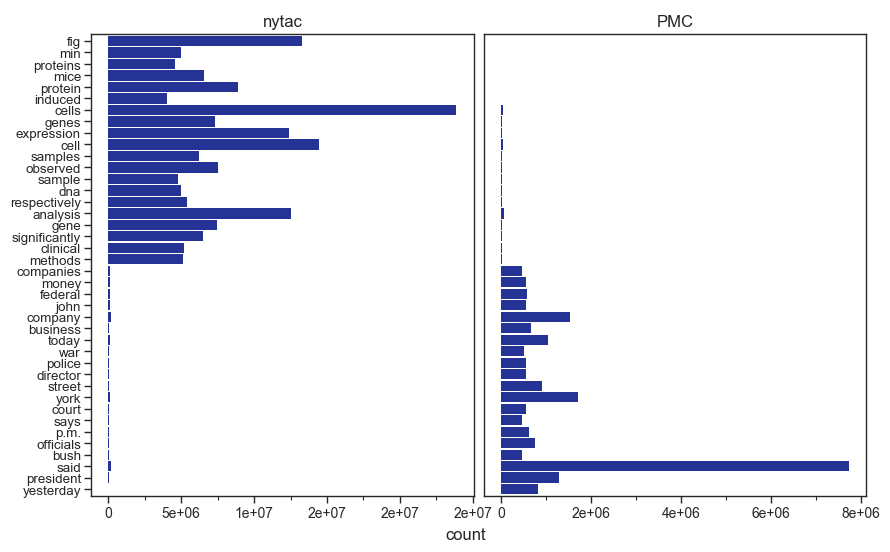

<ggplot: (-9223363298668133204)>


In [47]:
g = plot_bargraph(count_plot_df, plot_special_char_df)
g.save("output/svg_files/pmc_nytac_frequency_bar_special_char_removed.svg")
print(g)

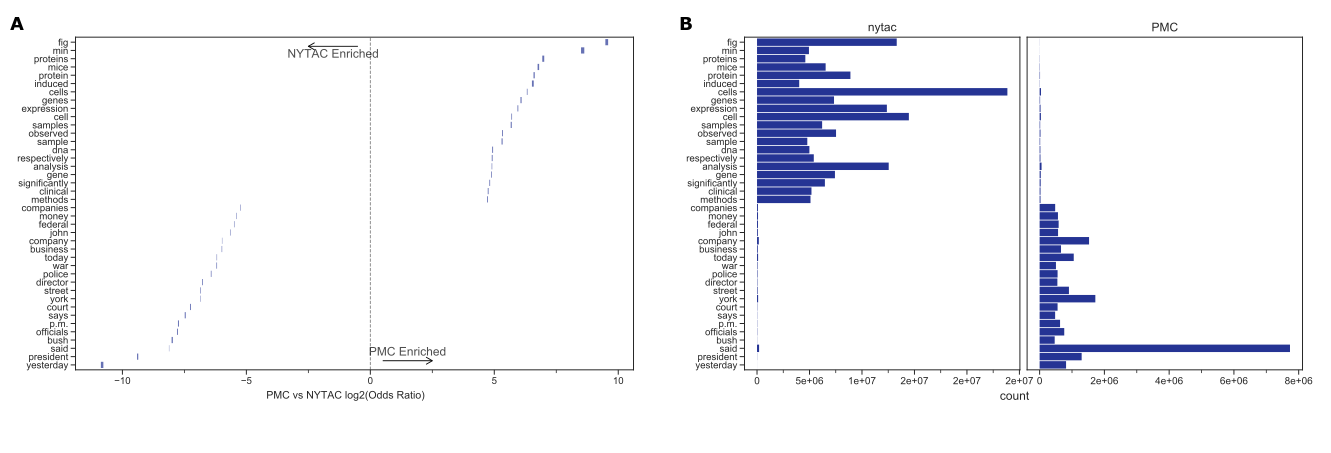

In [48]:
fig_output_path = "output/figures/pmc_vs_reference_special_char_removed.png"

fig = plot_point_bar_figure(
    "output/svg_files/pmc_nytac_frequency_odds_special_char_removed.svg",
    "output/svg_files/pmc_nytac_frequency_bar_special_char_removed.svg",
)

# save generated SVG files
svg2png(bytestring=fig.to_str(), write_to=fig_output_path, dpi=75)

Image(fig_output_path)

# Preprint vs Published

In [49]:
preprint_published_comparison = pd.read_csv(
    "output/comparison_stats/preprint_to_published_comparison.tsv", sep="\t"
).assign(odds_ratio=lambda x: 1 / x.odds_ratio.values)
preprint_published_comparison.head()

,lemma,corpus_one_a,corpus_two_b,corpus_one_c,corpus_two_d,log_likelihood,odds_ratio
0,n,92167,127120,89908910,81373377,9614.587584,1.523908
1,5,157973,134581,89908910,81373377,266.008088,0.941285
2,table,135000,130113,89908910,81373377,261.397415,1.064896
3,found,137176,116133,89908910,81373377,280.514612,0.935401
4,methods,120787,104507,89908910,81373377,113.553738,0.955973


In [50]:
preprint_published_comparison_special_char = pd.read_csv(
    "output/comparison_stats/preprint_to_published_comparison_special_chars_removed.tsv",
    sep="\t",
).assign(odds_ratio=lambda x: 1 / x.odds_ratio.values)
preprint_published_comparison_special_char.head()

,lemma,corpus_one_a,corpus_two_b,corpus_one_c,corpus_two_d,log_likelihood,odds_ratio
0,reads,88790,68060,193427969,130362488,633.838278,1.137351
1,system,99703,61713,193427969,130362488,277.788486,0.918407
2,sample,118574,82765,193427969,130362488,59.730513,1.035676
3,compared,158707,101852,193427969,130362488,149.063377,0.952226
4,mean,133827,95028,193427969,130362488,150.905439,1.053597


## Line Plot

### Original

In [51]:
full_plot_df = calculate_confidence_intervals(preprint_published_comparison)
full_plot_df.head()

,lemma,corpus_one_a,corpus_two_b,corpus_one_c,corpus_two_d,log_likelihood,odds_ratio,lower_odds,upper_odds,z_value,p_value
0,n,92167,127120,89908910,81373377,9614.587584,1.523908,1.511033,1.536893,97.316354,0.000000e+00
1,5,157973,134581,89908910,81373377,266.008088,0.941285,0.934461,0.948160,-16.297879,5.108839e-60
2,table,135000,130113,89908910,81373377,261.397415,1.064896,1.056812,1.073042,16.172227,3.959148e-59
3,found,137176,116133,89908910,81373377,280.514612,0.935401,0.928114,0.942746,-16.734671,3.663025e-63
4,methods,120787,104507,89908910,81373377,113.553738,0.955973,0.948085,0.963927,-10.650843,8.639685e-27


In [52]:
plot_df = (
    full_plot_df.sort_values("odds_ratio", ascending=False)
    .iloc[3:]
    .head(subset)
    .append(full_plot_df.sort_values("odds_ratio", ascending=False).tail(subset))
    .assign(
        odds_ratio=lambda x: x.odds_ratio.apply(lambda x: np.log2(x)),
        lower_odds=lambda x: x.lower_odds.apply(lambda x: np.log2(x)),
        upper_odds=lambda x: x.upper_odds.apply(lambda x: np.log2(x)),
    )
)
plot_df.head()

,lemma,corpus_one_a,corpus_two_b,corpus_one_c,corpus_two_d,log_likelihood,odds_ratio,lower_odds,upper_odds,z_value,p_value
58,file,25989,96985,89908910,81373377,50989.827175,2.043768,2.024012,2.063524,202.765119,0.0
61,additional,55456,108204,89908910,81373377,22954.893641,1.108246,1.093472,1.123019,147.027921,0.0
42,±,44755,85898,89908910,81373377,17594.697579,1.084483,1.067993,1.100973,128.899506,0.0
43,–,71970,117798,89908910,81373377,16202.659431,0.854755,0.841370,0.868140,125.162200,0.0
67,supplementary,89866,131481,89908910,81373377,12555.921716,0.692914,0.680668,0.705161,110.898622,0.0


/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 10 x 6 in image.
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/svg_files/preprint_published_frequency_odds.svg
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 10 x 6 in image.
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/svg_files/preprint_published_frequency_odds.png


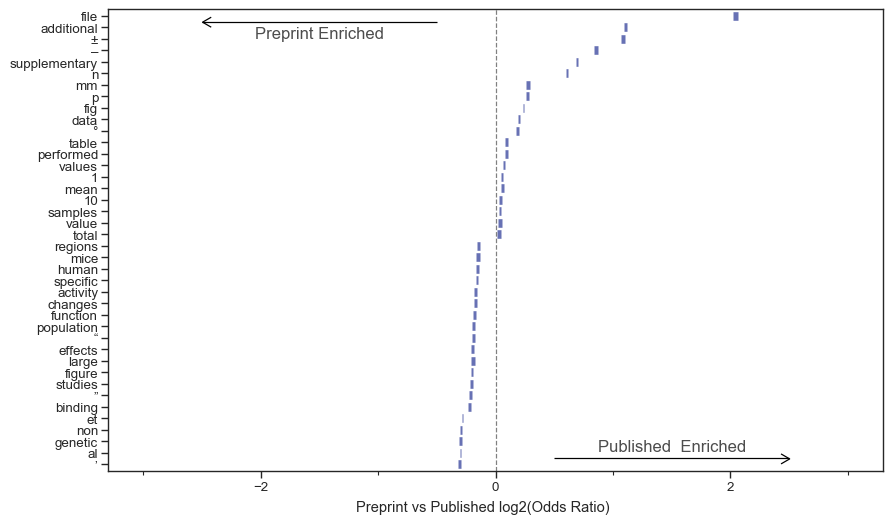

<ggplot: (-9223363298668619253)>


In [53]:
g = (
    p9.ggplot(
        plot_df, p9.aes(y="lemma", x="lower_odds", xend="upper_odds", yend="lemma")
    )
    + p9.geom_segment(color="#253494", size=3.5, alpha=0.7)
    + p9.scale_y_discrete(
        limits=(plot_df.sort_values("odds_ratio", ascending=True).lemma.tolist())
    )
    + p9.scale_x_continuous(limits=(-3, 3))
    + p9.geom_vline(p9.aes(xintercept=0), linetype="--", color="grey")
    + p9.annotate(
        "segment",
        x=0.5,
        xend=2.5,
        y=1.5,
        yend=1.5,
        colour="black",
        size=0.5,
        alpha=1,
        arrow=p9.arrow(length=0.1),
    )
    + p9.annotate("text", label="Published  Enriched", x=1.5, y=2.5, size=12, alpha=0.7)
    + p9.annotate(
        "segment",
        x=-0.5,
        xend=-2.5,
        y=39.5,
        yend=39.5,
        colour="black",
        size=0.5,
        alpha=1,
        arrow=p9.arrow(length=0.1),
    )
    + p9.annotate("text", label="Preprint Enriched", x=-1.5, y=38.5, size=12, alpha=0.7)
    + p9.theme_seaborn(context="paper", style="ticks", font_scale=1.1, font="Arial")
    + p9.theme(
        figure_size=(10, 6),
        panel_grid_minor=p9.element_blank(),
    )
    + p9.labs(y=None, x="Preprint vs Published log2(Odds Ratio)")
)
g.save("output/svg_files/preprint_published_frequency_odds.svg")
g.save("output/svg_files/preprint_published_frequency_odds.png", dpi=250)
print(g)

In [54]:
count_plot_df = create_lemma_count_df(plot_df, "preprint", "published").replace(
    {"preprint": "Preprint", "published": "Published"}
)
count_plot_df.head()

,lemma,count,repository
0,file,25989,Preprint
1,additional,55456,Preprint
2,±,44755,Preprint
3,–,71970,Preprint
4,supplementary,89866,Preprint


/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 10 x 6 in image.
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/svg_files/preprint_published_frequency_bar.svg


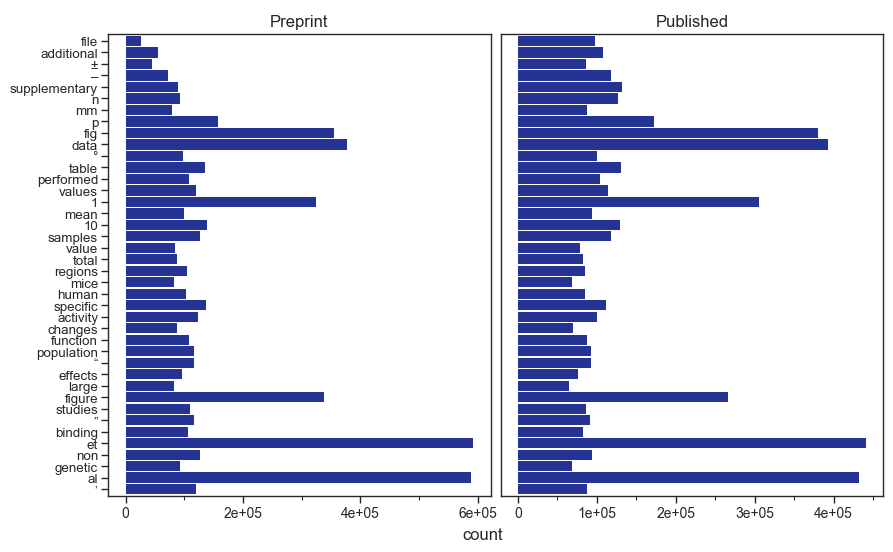

<ggplot: (8738186264987)>


In [55]:
g = plot_bargraph(count_plot_df, plot_df)
g.save("output/svg_files/preprint_published_frequency_bar.svg", dpi=75)
print(g)

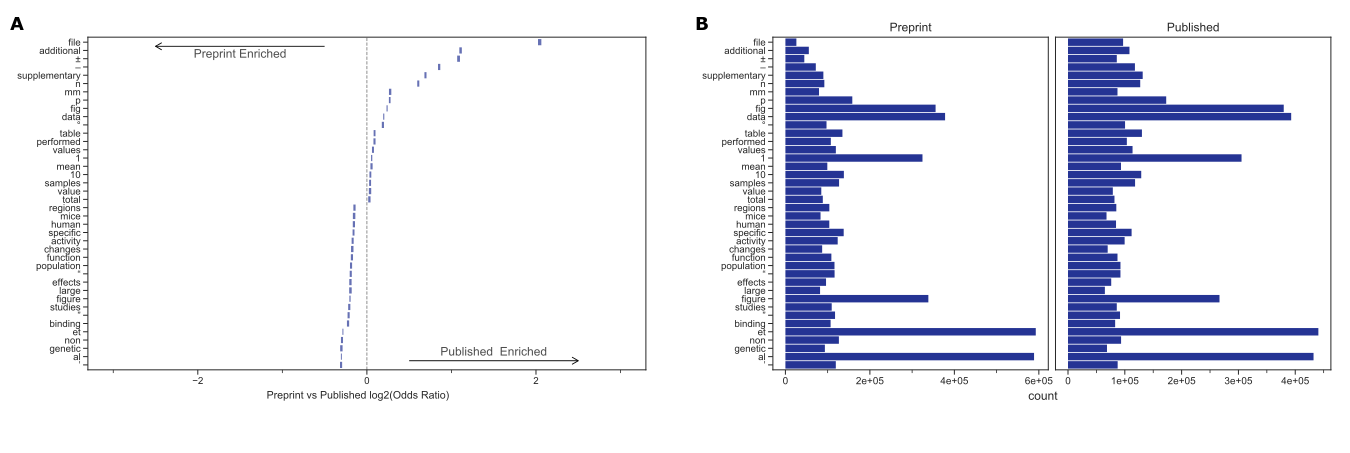

In [56]:
fig_output_path = "output/figures/preprint_published_comparison.png"

fig = plot_point_bar_figure(
    "output/svg_files/preprint_published_frequency_odds.svg",
    "output/svg_files/preprint_published_frequency_bar.svg",
)

# save generated SVG files
svg2png(bytestring=fig.to_str(), write_to=fig_output_path, dpi=75)

Image(fig_output_path)

### Special Char Removed

In [57]:
full_plot_special_char_df = calculate_confidence_intervals(
    preprint_published_comparison_special_char
)
full_plot_special_char_df.head()

,lemma,corpus_one_a,corpus_two_b,corpus_one_c,corpus_two_d,log_likelihood,odds_ratio,lower_odds,upper_odds,z_value,p_value
0,reads,88790,68060,193427969,130362488,633.838278,1.137351,1.126048,1.148768,25.255924,4.874882e-141
1,system,99703,61713,193427969,130362488,277.788486,0.918407,0.909231,0.927675,-16.613783,2.769367e-62
2,sample,118574,82765,193427969,130362488,59.730513,1.035676,1.026519,1.044914,7.736763,5.098982e-15
3,compared,158707,101852,193427969,130362488,149.063377,0.952226,0.944759,0.959752,-12.188031,1.800066e-34
4,mean,133827,95028,193427969,130362488,150.905439,1.053597,1.044870,1.062397,12.303128,4.356644e-35


In [58]:
plot_special_char_df = (
    full_plot_special_char_df.sort_values("odds_ratio", ascending=False)
    .head(subset)
    .append(
        full_plot_special_char_df.sort_values("odds_ratio", ascending=False).tail(
            subset
        )
    )
    .assign(
        odds_ratio=lambda x: x.odds_ratio.apply(lambda x: np.log2(x)),
        lower_odds=lambda x: x.lower_odds.apply(lambda x: np.log2(x)),
        upper_odds=lambda x: x.upper_odds.apply(lambda x: np.log2(x)),
    )
)
plot_special_char_df.head()

,lemma,corpus_one_a,corpus_two_b,corpus_one_c,corpus_two_d,log_likelihood,odds_ratio,lower_odds,upper_odds,z_value,p_value
43,file,32152,98692,193427969,130362488,66761.915398,2.187292,2.169132,2.205453,236.065618,0.0
57,additional,71947,110165,193427969,130362488,30186.351822,1.183927,1.170369,1.197485,171.154371,0.0
75,supplementary,117573,134462,193427969,130362488,17530.158102,0.762909,0.751614,0.774204,132.387421,0.0
65,min,65949,69779,193427969,130362488,6865.648548,0.650710,0.635350,0.666070,83.032864,0.0
68,data,495465,399229,193427969,130362488,6980.572908,0.257701,0.251679,0.263723,83.869923,0.0


/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 10 x 6 in image.
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/svg_files/preprint_published_frequency_odds_special_char_removed.svg
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 10 x 6 in image.
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/svg_files/preprint_published_frequency_odds_special_char_removed.png


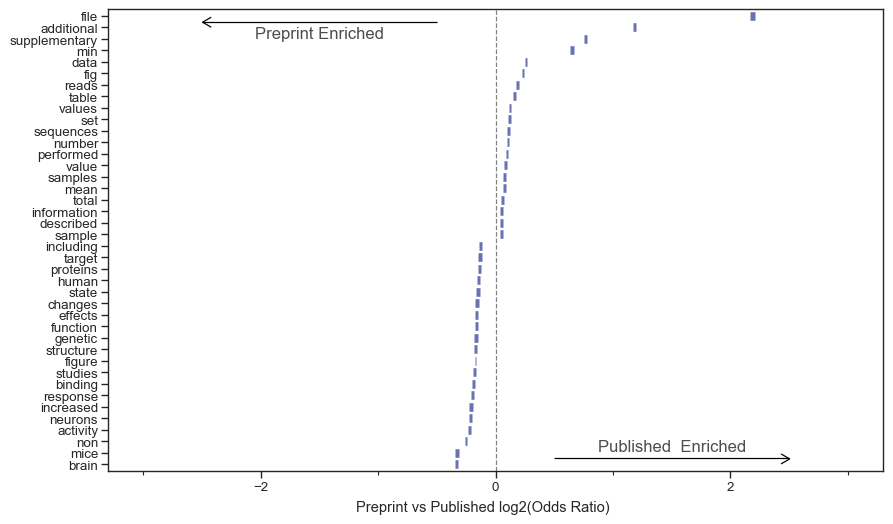

<ggplot: (8738186038343)>


In [59]:
g = (
    p9.ggplot(
        plot_special_char_df,
        p9.aes(y="lemma", x="lower_odds", xend="upper_odds", yend="lemma"),
    )
    + p9.geom_segment(color="#253494", size=3.5, alpha=0.7)
    + p9.scale_y_discrete(
        limits=(
            plot_special_char_df.sort_values(
                "odds_ratio", ascending=True
            ).lemma.tolist()
        )
    )
    + p9.scale_x_continuous(limits=(-3, 3))
    + p9.geom_vline(p9.aes(xintercept=0), linetype="--", color="grey")
    + p9.annotate(
        "segment",
        x=0.5,
        xend=2.5,
        y=1.5,
        yend=1.5,
        colour="black",
        size=0.5,
        alpha=1,
        arrow=p9.arrow(length=0.1),
    )
    + p9.annotate("text", label="Published  Enriched", x=1.5, y=2.5, size=12, alpha=0.7)
    + p9.annotate(
        "segment",
        x=-0.5,
        xend=-2.5,
        y=39.5,
        yend=39.5,
        colour="black",
        size=0.5,
        alpha=1,
        arrow=p9.arrow(length=0.1),
    )
    + p9.annotate("text", label="Preprint Enriched", x=-1.5, y=38.5, size=12, alpha=0.7)
    + p9.theme_seaborn(context="paper", style="ticks", font_scale=1.1, font="Arial")
    + p9.theme(
        figure_size=(10, 6),
        panel_grid_minor=p9.element_blank(),
    )
    + p9.labs(y=None, x="Preprint vs Published log2(Odds Ratio)")
)
g.save("output/svg_files/preprint_published_frequency_odds_special_char_removed.svg")
g.save(
    "output/svg_files/preprint_published_frequency_odds_special_char_removed.png",
    dpi=250,
)
print(g)

In [60]:
count_plot_df = create_lemma_count_df(
    plot_special_char_df, "preprint", "published"
).replace({"preprint": "Preprint", "published": "Published"})
count_plot_df.head()

,lemma,count,repository
0,file,32152,Preprint
1,additional,71947,Preprint
2,supplementary,117573,Preprint
3,min,65949,Preprint
4,data,495465,Preprint


/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 10 x 6 in image.
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/svg_files/preprint_published_frequency_bar_special_char_removed.svg


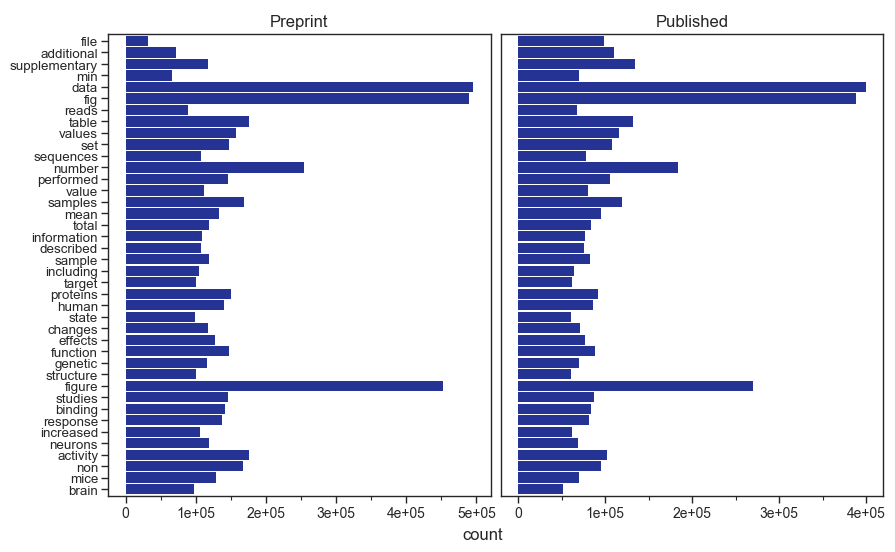

<ggplot: (-9223363298667775179)>


In [61]:
g = plot_bargraph(count_plot_df, plot_special_char_df)
g.save(
    "output/svg_files/preprint_published_frequency_bar_special_char_removed.svg", dpi=75
)
print(g)

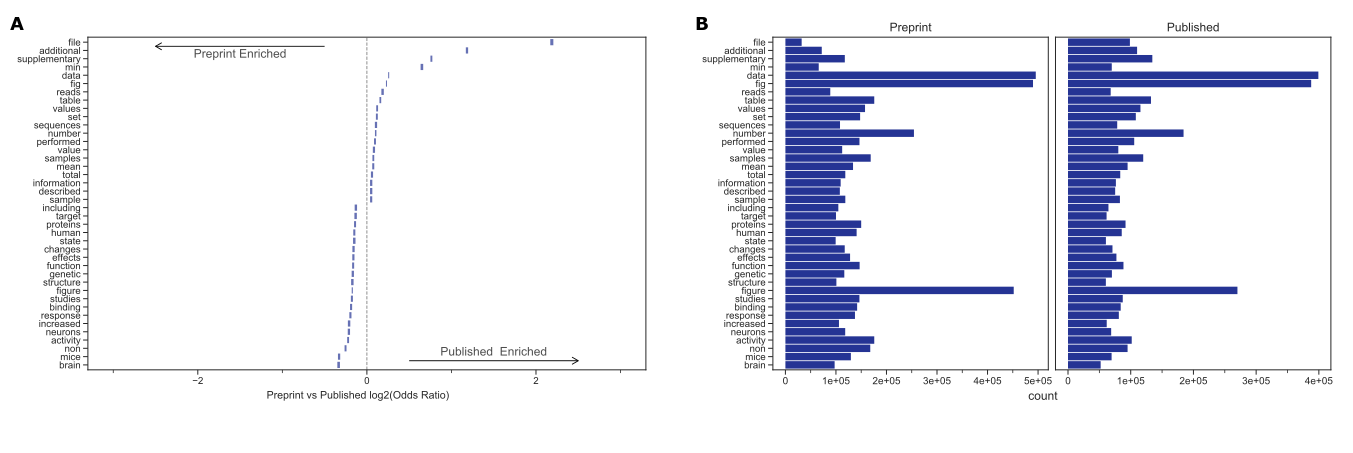

In [64]:
fig_output_path = (
    "output/figures/preprint_published_comparison_special_char_removed.png"
)

fig = plot_point_bar_figure(
    "output/svg_files/preprint_published_frequency_odds_special_char_removed.svg",
    "output/svg_files/preprint_published_frequency_bar_special_char_removed.svg",
)

# save generated SVG files
svg2png(bytestring=fig.to_str(), write_to=fig_output_path, dpi=96)

Image(fig_output_path)